In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import os

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
cd /content/gdrive/My\ Drive/Vahid\ Ghafourian

/content/gdrive/My Drive


In [0]:
"""Load data"""
data = loadmat("../datasets/data_s1.mat")
trendTemp = loadmat("../datasets/data_trend_tem.mat")

In [0]:
data = data['F01']
trendTemp = trendTemp['trend_tem']

In [10]:
"""To numpy array"""
cols = ['Power','Input DG','Output Temp','Output Press','Fuel Debi','TIT','TET']
data = pd.DataFrame(data, columns=cols)
np.shape(data)

(1036800, 7)

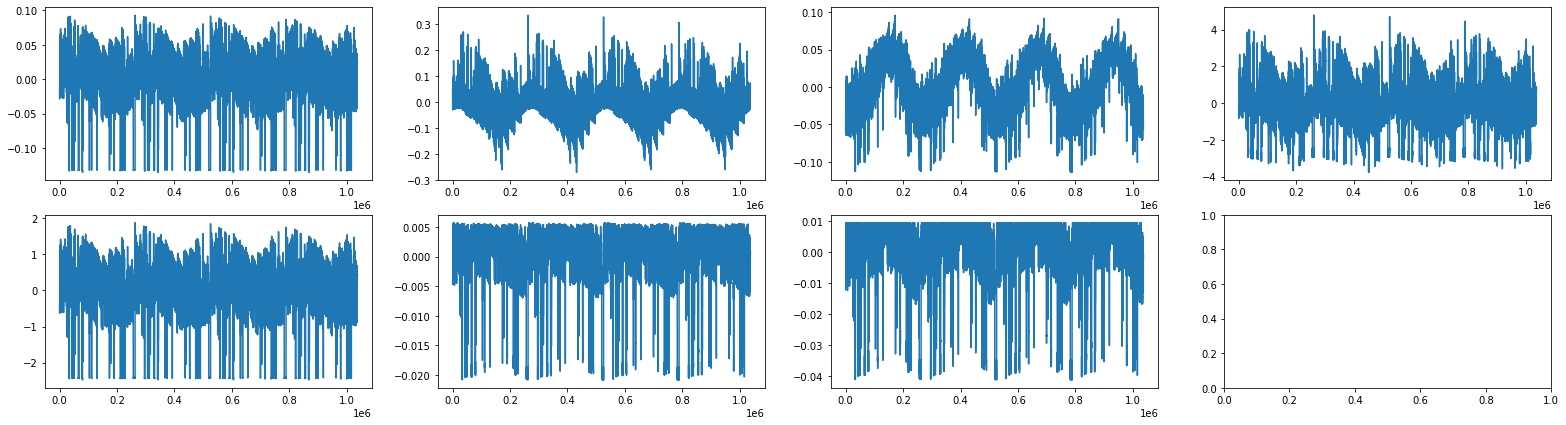

In [13]:
"""Plot data"""
fig, ax = plt.subplots(2,4, figsize=(27,7))
c = 0
for i in range(0,2):
    for j in range(0,4):
        if (c<7):
            ax[i][j].plot(data[cols[c]])
        c = c+1

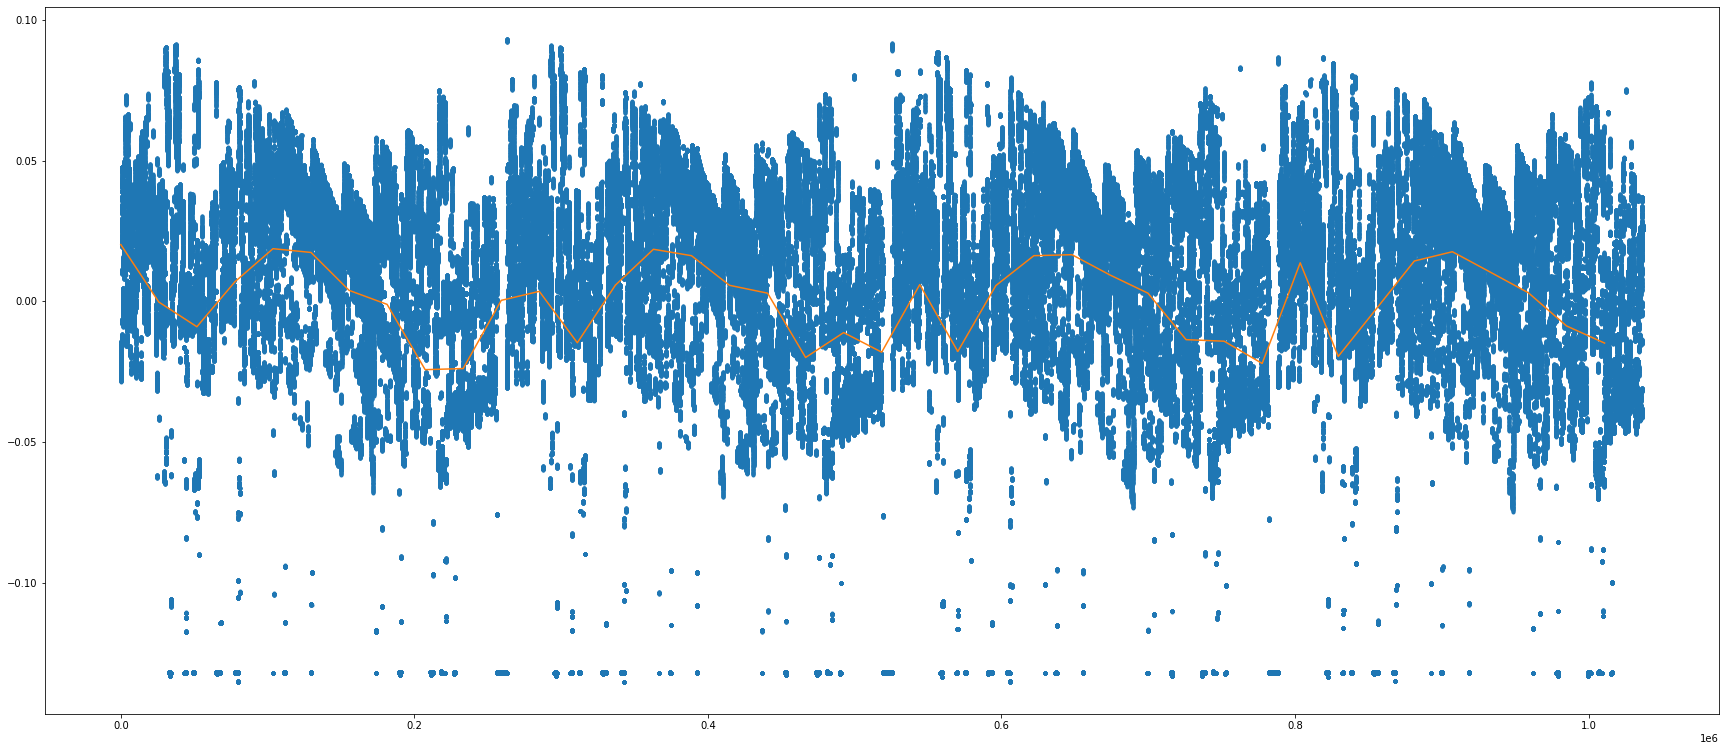

In [14]:
"""Play with one feature"""
plt.figure(figsize=(30,13))
plt.plot(data[cols[0]], '.')
tol = 25920
l = []
for i in range(0,1036800,tol):
    l.append(np.mean(data[cols[0]][i:i+tol]))
plt.plot(range(0,1036800,tol),l)

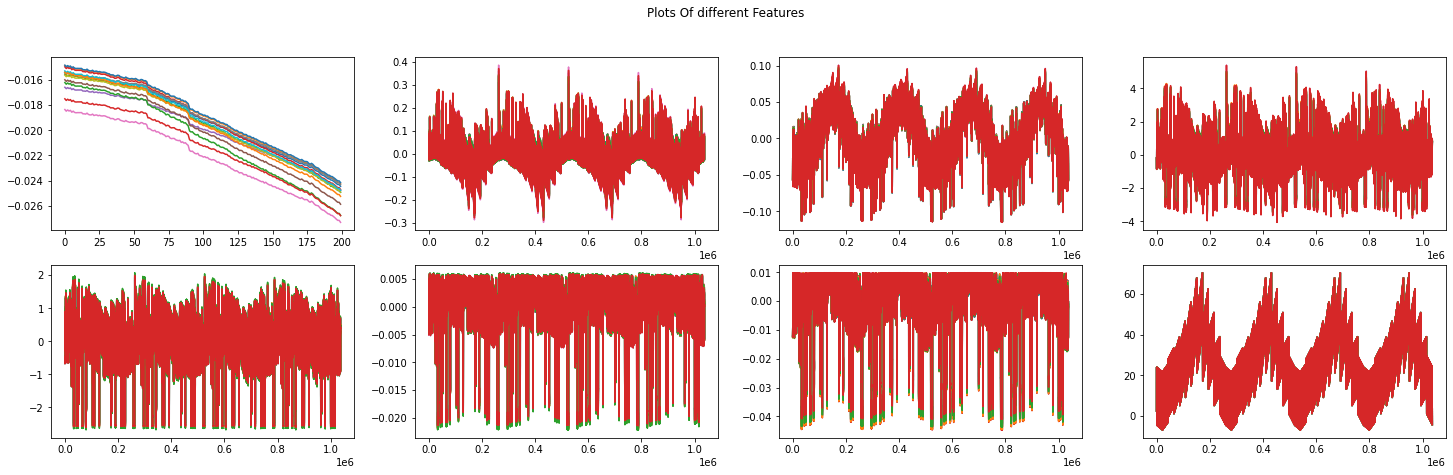

In [23]:
fig, ax = plt.subplots(2, 4,figsize=(25,7))
fig.suptitle('Plots Of different Features')
dataDir = "../datasets/"
mats = []
for file in os.listdir(dataDir):
     if file.endswith(".mat"):
        mats.append(loadmat(dataDir+file))

dst = loadmat('../datasets/data_trend_tem.mat')
dst_l = dst['trend_tem'].tolist()[0]
# dst['trend_tem']
dst_list = np.asarray(dst_l)

cols = ['Power','Input DG','Output Temp','Output Press','Fuel Debi','TIT','TET']
df = {}

for i in range(len(mats)-1):
    df[i] = pd.DataFrame(list(mats[i].values())[3],columns= cols)
    df[i]['Temperature'] = dst_list
    if i == 0:
        df[i]['State'] = '1'
    else:
        df[i]['State'] = '0'
    
df[13].columns

for i in range(len(mats)-1):
    ax[0,0].plot(df[i]['Power'][0:200])
    ax[0,1].plot(df[i]['Input DG'])
    ax[0,2].plot(df[i]['Output Temp'])
    ax[0,3].plot(df[i]['Output Press'])
    ax[1,0].plot(df[i]['Fuel Debi'])
    ax[1,1].plot(df[i]['TIT'])
    ax[1,2].plot(df[i]['TET'])
    ax[1,3].plot(df[i]['Temperature'])